- It is Statiscal testing if there is a enough evidence about sample data then we can draw conclusion for population

In [1200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1201]:
df=pd.read_csv('T:/python/class/class_21/titanic_data.csv')

In [1202]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1203]:
mean_value =int( df['Age'].mean())
median_value = int(df['Age'].median())
mode_value = int(df['Age'].mode())

In [1204]:
def replace(df,var,value,name):
    df[var+name+'_repalced']=df[var].fillna(value)
    

In [1205]:
replace(df,'Age',mean_value,'mean')

In [1206]:
replace(df,'Age',median_value,'median')

In [1207]:
replace(df,'Age',mode_value,'mode')

In [1208]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agemean_repalced,Agemedian_repalced,Agemode_repalced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0


In [1209]:
# check by graphical representation
def plotting(df,var,var1,var2,var3):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    df[var].plot(kind='kde',ax=ax,color='r',legend="var")
    df[var1].plot(kind='kde',ax=ax,color='b',legend="var1")
    df[var2].plot(kind='kde',ax=ax,color='g',legend="var2")
    df[var3].plot(kind='kde',ax=ax,color='m',legend="var3")
    plt.show()

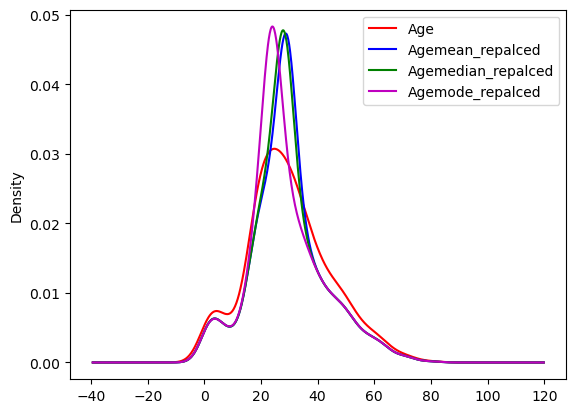

In [1210]:
plotting(df,'Age','Agemean_repalced','Agemedian_repalced','Agemode_repalced')

In [1211]:
df=df.drop(['Age','Agemedian_repalced','Agemode_repalced'],axis=1)

In [1212]:
df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Agemean_repalced      0
dtype: int64

# Numeric dataset for Hypothesis Testing

In [1213]:
numerical = df.select_dtypes(exclude="object")


In [1214]:
numerical.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
SibSp               0
Parch               0
Fare                0
Agemean_repalced    0
dtype: int64

In [1215]:
numerical=numerical.drop(['Survived'],axis=1)


In [1216]:
numerical.columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Agemean_repalced'], dtype='object')

In [1217]:
# to do hypothesis testing we use pearson for numeric datasets
import scipy
from scipy.stats import pearsonr

In [1218]:
corr=[]
for i in numerical.columns:
    result=pearsonr(numerical[i],df['Survived'])
    corr.append(result)
print(corr)

[PearsonRResult(statistic=-0.005006660767066499, pvalue=0.8813657768789032), PearsonRResult(statistic=-0.33848103596101514, pvalue=2.5370473879790813e-25), PearsonRResult(statistic=-0.03532249888573552, pvalue=0.29224392869800375), PearsonRResult(statistic=0.08162940708348344, pvalue=0.014799245374712841), PearsonRResult(statistic=0.2573065223849624, pvalue=6.120189341917992e-15), PearsonRResult(statistic=-0.06781384723050604, pvalue=0.043000401054291926)]


In [1219]:
corr=np.array(corr)
corr

array([[-5.00666077e-03,  8.81365777e-01],
       [-3.38481036e-01,  2.53704739e-25],
       [-3.53224989e-02,  2.92243929e-01],
       [ 8.16294071e-02,  1.47992454e-02],
       [ 2.57306522e-01,  6.12018934e-15],
       [-6.78138472e-02,  4.30004011e-02]])

In [1220]:
# we taking only p value 
p_value_num=pd.Series(corr[:,1],index=numerical.columns)
p_value_num

PassengerId         8.813658e-01
Pclass              2.537047e-25
SibSp               2.922439e-01
Parch               1.479925e-02
Fare                6.120189e-15
Agemean_repalced    4.300040e-02
dtype: float64

In [1221]:
p_value_num=p_value_num.sort_values(ascending=True)
p_value_num

Pclass              2.537047e-25
Fare                6.120189e-15
Parch               1.479925e-02
Agemean_repalced    4.300040e-02
SibSp               2.922439e-01
PassengerId         8.813658e-01
dtype: float64

<Axes: >

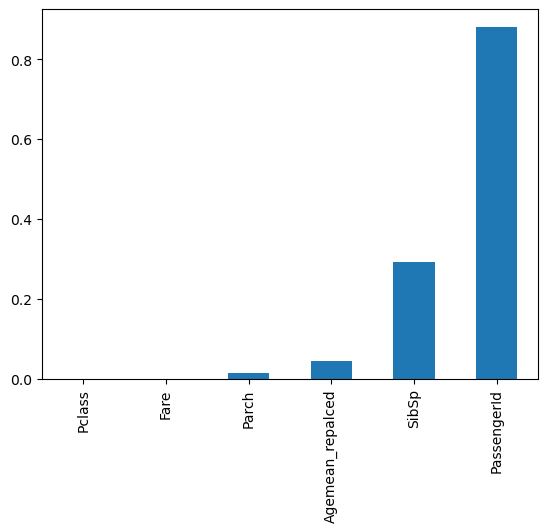

In [1222]:
p_value_num.plot.bar()

In [1223]:
if p_value_num['PassengerId']>0.05:
    print("null hypo is rejected and alternative is selected")
else:
    print(" null hypo is selected")# null is selected then keep that colum

null hypo is rejected and alternative is selected


In [1224]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agemean_repalced
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [1225]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [1226]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Agemean_repalced
0,0,3,male,1,0,7.2500,NaN,S,22.0
1,1,1,female,1,0,71.2833,C85,C,38.0
2,1,3,female,0,0,7.9250,NaN,S,26.0
3,1,1,female,1,0,53.1000,C123,S,35.0
4,0,3,male,0,0,8.0500,NaN,S,35.0


# Categories Datasets for Hypothesis Testing

In [1229]:
df['Embarked']=df['Embarked'].str[0]
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [1230]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

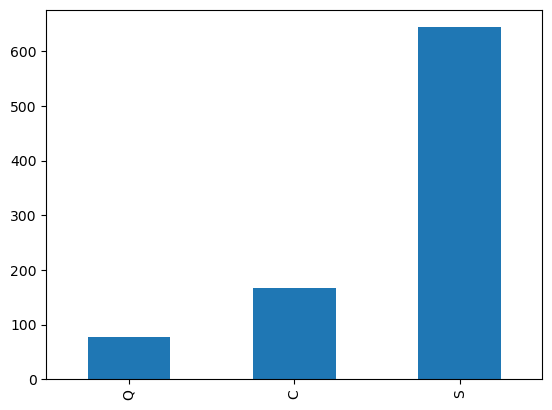

In [1231]:
df['Embarked'].value_counts().sort_values().plot.bar()

In [1232]:
#a=df['Embarked'].mode()[0]

In [1233]:
#df['Embarked'].fillna(df['Embarked'].mode()[0])

In [1234]:
df['Embarked']=df['Embarked'].fillna('S')

In [1235]:
df['Embarked'].isnull().sum()

0

In [1236]:
# Null value for Categories
df['Cabin_first_char']=df['Cabin'].str[0]
df['Cabin_first_char']


0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_first_char, Length: 891, dtype: object

In [1237]:
df['Cabin_first_char'].value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_first_char, dtype: int64

<Axes: >

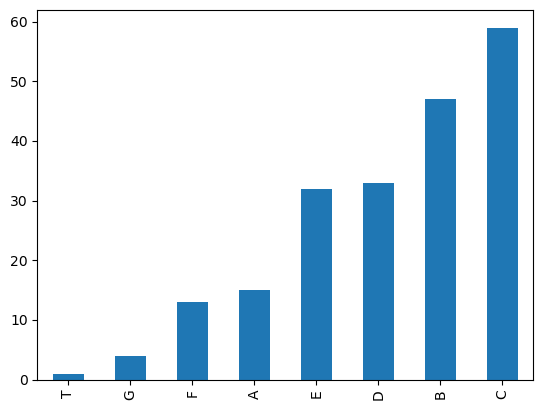

In [1238]:
df['Cabin_first_char'].value_counts().sort_values(ascending=True).plot.bar()

In [1239]:
df['Cabin_first_char']=df['Cabin'].fillna('C')

In [1240]:
df['Cabin_first_char'].isnull().sum()

0

In [1241]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Agemean_repalced,Cabin_first_char
0,0,3,male,1,0,7.2500,NaN,S,22.0,C
1,1,1,female,1,0,71.2833,C85,C,38.0,C85
2,1,3,female,0,0,7.9250,NaN,S,26.0,C
3,1,1,female,1,0,53.1000,C123,S,35.0,C123
4,0,3,male,0,0,8.0500,NaN,S,35.0,C


In [1242]:
df=df.drop(['Cabin'],axis=1)

In [1243]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agemean_repalced,Cabin_first_char
0,0,3,male,1,0,7.2500,S,22.0,C
1,1,1,female,1,0,71.2833,C,38.0,C85
2,1,3,female,0,0,7.9250,S,26.0,C
3,1,1,female,1,0,53.1000,S,35.0,C123
4,0,3,male,0,0,8.0500,S,35.0,C


In [1244]:
df['cabin_num']=df['Cabin_first_char'].str.extract('(\d+)')
df['cabin_cat']=df['Cabin_first_char'].str[0]

In [1245]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agemean_repalced,Cabin_first_char,cabin_num,cabin_cat
0,0,3,male,1,0,7.2500,S,22.0,C,NaN,C
1,1,1,female,1,0,71.2833,C,38.0,C85,85,C
2,1,3,female,0,0,7.9250,S,26.0,C,NaN,C
3,1,1,female,1,0,53.1000,S,35.0,C123,123,C
4,0,3,male,0,0,8.0500,S,35.0,C,NaN,C


In [1246]:
df.dtypes

Survived              int64
Pclass                int64
Sex                  object
SibSp                 int64
Parch                 int64
Fare                float64
Embarked             object
Agemean_repalced    float64
Cabin_first_char     object
cabin_num            object
cabin_cat            object
dtype: object

In [1247]:
mode_values=int(df['cabin_num'].mode()[0])
mode_values

33

In [1248]:
def replace(df,var,value,name):
    df[var+name+'_repalced']=df[var].fillna(value)

In [1249]:
replace(df,'cabin_num',mode_values ,'mode')

In [1250]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agemean_repalced,Cabin_first_char,cabin_num,cabin_cat,cabin_nummode_repalced
0,0,3,male,1,0,7.2500,S,22.0,C,NaN,C,33
1,1,1,female,1,0,71.2833,C,38.0,C85,85,C,85
2,1,3,female,0,0,7.9250,S,26.0,C,NaN,C,33
3,1,1,female,1,0,53.1000,S,35.0,C123,123,C,123
4,0,3,male,0,0,8.0500,S,35.0,C,NaN,C,33


In [1251]:
df['cabin_nummode_repalced'].isnull().sum()

0

In [1252]:
df=df.drop(['Cabin_first_char','cabin_num'],axis=1)

In [1253]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agemean_repalced,cabin_cat,cabin_nummode_repalced
0,0,3,male,1,0,7.2500,S,22.0,C,33
1,1,1,female,1,0,71.2833,C,38.0,C,85
2,1,3,female,0,0,7.9250,S,26.0,C,33
3,1,1,female,1,0,53.1000,S,35.0,C,123
4,0,3,male,0,0,8.0500,S,35.0,C,33


In [1254]:
#categorical=df.select_dtypes(include="object")
#for col in categorical.columns:
#   print(col,':',len(categorical[col].unique()),'labels')

In [1255]:
from sklearn.preprocessing import OneHotEncoder

In [1256]:
df[ 'cabin_cat'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_cat, dtype: int64

In [1257]:
from sklearn.compose import make_column_transformer
transformer=make_column_transformer((OneHotEncoder(drop='first'),['Sex', 'Embarked']))

In [1258]:
transformed_data=transformer.fit_transform(df)

In [1259]:
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())

In [1260]:
transformed_df.head()

,onehotencoder__Sex_male,onehotencoder__Embarked_Q,onehotencoder__Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0


In [1261]:
df=pd.concat([df,transformed_df],axis=1)

In [1262]:
df=df.drop(['Sex','Embarked'],axis=1)

In [1263]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Agemean_repalced,cabin_cat,cabin_nummode_repalced,onehotencoder__Sex_male,onehotencoder__Embarked_Q,onehotencoder__Embarked_S
0,0,3,1,0,7.2500,22.0,C,33,1.0,0.0,1.0
1,1,1,1,0,71.2833,38.0,C,85,0.0,0.0,0.0
2,1,3,0,0,7.9250,26.0,C,33,0.0,0.0,1.0
3,1,1,1,0,53.1000,35.0,C,123,0.0,0.0,1.0
4,0,3,0,0,8.0500,35.0,C,33,1.0,0.0,1.0


In [1264]:
df['cabin_cat']=df['cabin_cat'].map({'A':0,'B':1,'C':2,'D':3 ,'E':4 ,'F':5 ,'G':6,'T':7}).astype(int) 

In [1265]:
df['cabin_cat'].value_counts()

2    746
1     47
3     33
4     32
0     15
5     13
6      4
7      1
Name: cabin_cat, dtype: int64

In [1266]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Agemean_repalced,cabin_cat,cabin_nummode_repalced,onehotencoder__Sex_male,onehotencoder__Embarked_Q,onehotencoder__Embarked_S
0,0,3,1,0,7.2500,22.0,2,33,1.0,0.0,1.0
1,1,1,1,0,71.2833,38.0,2,85,0.0,0.0,0.0
2,1,3,0,0,7.9250,26.0,2,33,0.0,0.0,1.0
3,1,1,1,0,53.1000,35.0,2,123,0.0,0.0,1.0
4,0,3,0,0,8.0500,35.0,2,33,1.0,0.0,1.0


In [1267]:
df.dtypes

Survived                       int64
Pclass                         int64
SibSp                          int64
Parch                          int64
Fare                         float64
Agemean_repalced             float64
cabin_cat                      int32
cabin_nummode_repalced        object
onehotencoder__Sex_male      float64
onehotencoder__Embarked_Q    float64
onehotencoder__Embarked_S    float64
dtype: object

In [1268]:
import sklearn
from sklearn.feature_selection import chi2

In [1269]:
categorical=df[['cabin_cat','cabin_nummode_repalced','onehotencoder__Sex_male','onehotencoder__Embarked_Q','onehotencoder__Embarked_S']]

In [1270]:
categorical.columns

Index(['cabin_cat', 'cabin_nummode_repalced', 'onehotencoder__Sex_male',
       'onehotencoder__Embarked_Q', 'onehotencoder__Embarked_S'],
      dtype='object')

In [1271]:
corrs=[]
f=chi2(categorical,df['Survived'])
corrs.append(f)
print(corrs)

[(array([1.45269868e+00, 8.00698004e+01, 9.27024470e+01, 1.08467891e-02,
       5.48920482e+00]), array([2.28095420e-01, 3.61414230e-19, 6.07783826e-22, 9.17051963e-01,
       1.91342437e-02]))]


In [1272]:
corrs[0][1]

array([2.28095420e-01, 3.61414230e-19, 6.07783826e-22, 9.17051963e-01,
       1.91342437e-02])

In [1273]:
p_value_nums=pd.Series(corrs[0][1],index=categorical.columns)
p_value_nums

cabin_cat                    2.280954e-01
cabin_nummode_repalced       3.614142e-19
onehotencoder__Sex_male      6.077838e-22
onehotencoder__Embarked_Q    9.170520e-01
onehotencoder__Embarked_S    1.913424e-02
dtype: float64

<Axes: >

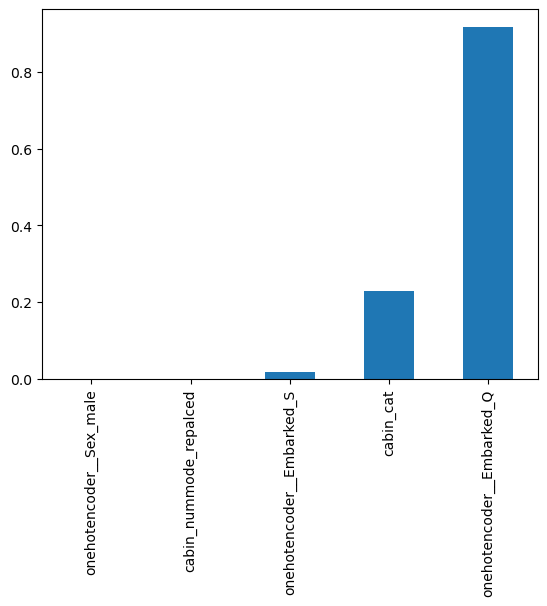

In [1274]:
p_value_nums.sort_values(ascending=True,inplace=True)
p_value_nums.plot.bar()

In [1192]:
if p_value_nums['onehotencoder__Embarked_Q'] > 0.05:
    print("null hypothesis is rejected ")
else:
    print("null hypothesis is selected")

null hypothesis is rejected 
